In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets

In [134]:
#12 columns X 8807
netflix = pd.read_csv ('/Users/lailaalmajnuni/Downloads/EDA/netflix_titles.csv', 
                       skipinitialspace = True)

#loading only 2 columns out of 49 X 85855
votes = pd.read_csv ('/Users/lailaalmajnuni/Downloads/EDA/IMDb_ratings.csv', skipinitialspace = True, 
                       usecols=['weighted_average_vote', 'imdb_title_id'])
#votes.info()

#loading 2 columns out of 22 X 85855
names = pd.read_csv ('/Users/lailaalmajnuni/Downloads/EDA/IMDb_movies.csv', skipinitialspace = True,
                     usecols=['original_title', 'imdb_title_id'])
#names.info()
names.head(10)

,imdb_title_id,original_title
0,tt0000009,Miss Jerry
1,tt0000574,The Story of the Kelly Gang
2,tt0001892,Den sorte drøm
3,tt0002101,Cleopatra
4,tt0002130,L'Inferno
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz..."
6,tt0002423,Madame DuBarry
7,tt0002445,Quo Vadis?
8,tt0002452,Independenta Romaniei
9,tt0002461,Richard III


## Joining IMDb Datasets

In [135]:
netflix['title'].str.strip()
netflix['title'].str.lower()
names['original_title'].str.strip()
names['original_title'].str.lower()

joined_IMDb = pd.merge(votes, names, how ='inner', on =['imdb_title_id'])
joined_IMDb.drop(['imdb_title_id'], axis = 1, inplace = True)
joined_IMDb.rename(columns = {'original_title':'title'}, inplace=True)
#joined_IMDb.info()

## Your Final Dataset To Work With
##### Joining the IMDb dataset with the Netflix dataset and clean the data


In [136]:
inner_final = pd.merge(joined_IMDb, netflix, how = 'inner', on =['title'])
inner_final.rename(columns = {'listed_in':'genre'}, inplace=True)
inner_final.rename(columns = {'weighted_average_vote':'votes'}, inplace=True)

inner_final.drop(['show_id', 'director', 'cast', 'description', 'duration', 'date_added'], 
                 axis = 1, inplace = True)
inner_final.drop_duplicates(subset=['title'], inplace=True)

inner_final.country.fillna("Country Unavailable", inplace=True)

inner_final.dropna(subset=["rating"], inplace=True)
inner_final.sort_values('votes', inplace=True)
inner_final.info()
#final dataset has a size of 7 X 3177

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177 entries, 3441 to 975
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   votes         3177 non-null   float64
 1   title         3177 non-null   object 
 2   type          3177 non-null   object 
 3   country       3177 non-null   object 
 4   release_year  3177 non-null   int64  
 5   rating        3177 non-null   object 
 6   genre         3177 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 198.6+ KB


## Geting a sence of the data distribution

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

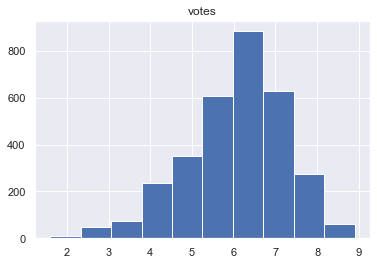

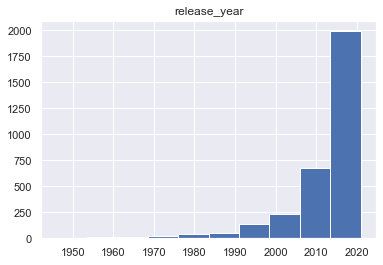

In [137]:
inner_final.hist(column='votes')
#votes are normaly distrubuted
inner_final.hist(column='release_year')
#release are expenantionally distrubuted

## 10 Most common Genres on Netflix

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dramas'),
  Text(0, 1, 'International Movies'),
  Text(0, 2, 'Comedies'),
  Text(0, 3, 'Independent Movies'),
  Text(0, 4, 'Action & Adventure'),
  Text(0, 5, 'Thrillers'),
  Text(0, 6, 'Romantic Movies'),
  Text(0, 7, 'Horror Movies'),
  Text(0, 8, 'Children & Family Movies'),
  Text(0, 9, 'Sci-Fi & Fantasy')])

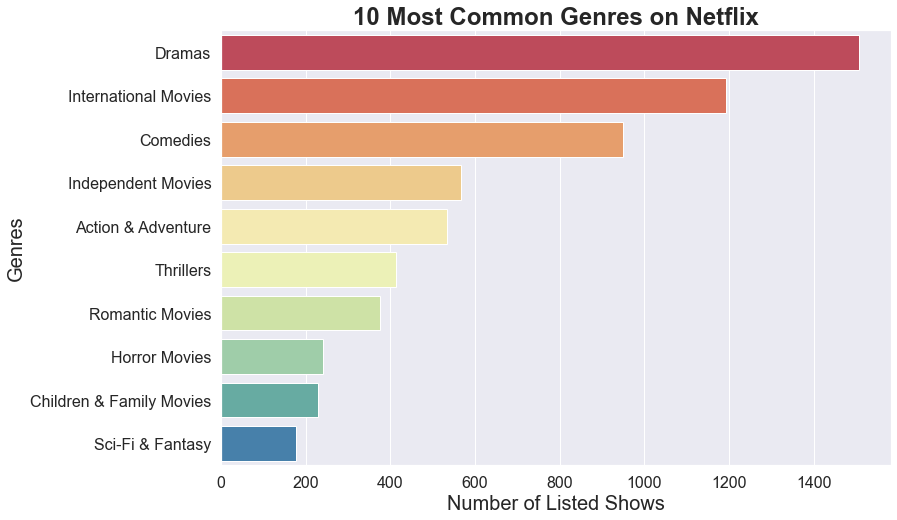

In [138]:
#spliting the genre column because is has a string of multiple genres.
filtering_genre =( inner_final.drop('genre', axis = 1)
            .join(inner_final['genre'].str.split(', ', expand = True)
                  .stack().reset_index(level = 1, drop = True).rename('genre')))
#drawning a fiugre
fig = plt.figure(figsize=(12, 8))
plt.title('10 Most Common Genres on Netflix', fontsize = 24,
         fontweight = 'bold')
sns.set(style="darkgrid")
sns.countplot(y = 'genre', order = filtering_genre.genre.value_counts().index[:10], 
                   data = filtering_genre, palette = 'Spectral')
plt.xlabel('Number of Listed Shows', fontsize = 20)
plt.ylabel('Genres', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.savefig('firstFig.png')

## Removing the first two quantile
#### only 50% of the dataset with the higher rating with the top 10 genres

In [139]:
df = filtering_genre
#df.info()
df = df.loc[df.genre.isin(['Dramas', 'International Movies', 'Comedies', 'Independent Movies', 'Action & Adventure',
                          'Thrillers', 'Romantic Movies'])]
lower_quantile , upper_quantile = df.votes.quantile([.5, 1])
top_five = df.loc[(df.votes > lower_quantile)]
#top_five.info()
#print(top_five.groupby('genre').agg(['min', 'max', 'median', 'mean', 'std', 'count']))
filtering_genre['type'].unique()
filtering_genre['type'].value_counts()[['TV Show']].sum()

738

(array([ 5.,  6.,  7.,  8.,  9., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

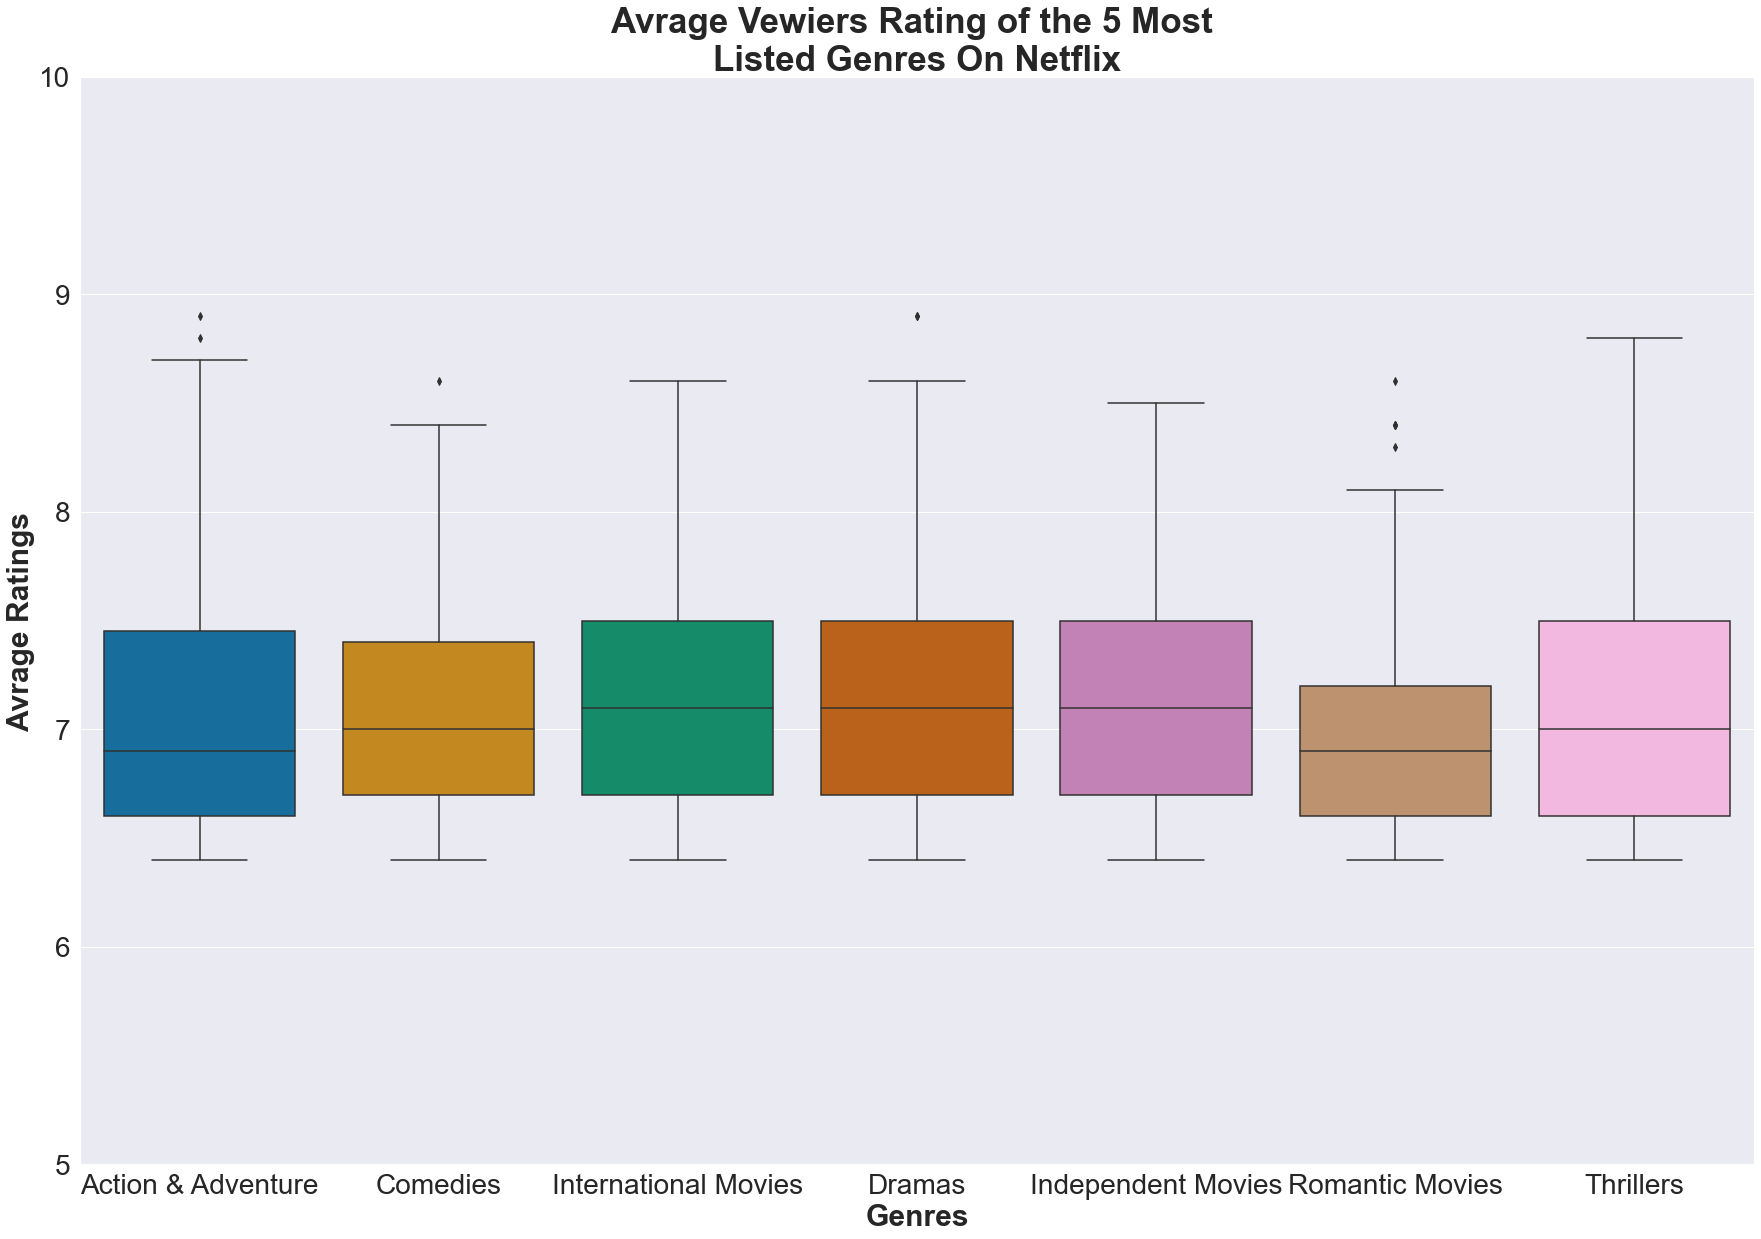

In [140]:
tf = plt.figure(figsize=(30, 20))
plt.title('Avrage Vewiers Rating of the 5 Most \nListed Genres On Netflix', fontsize = 35,
         fontweight = 'bold')

sns.set(style="darkgrid")
plt.ylim(5, 10)
sns.boxplot(y = 'votes', x = 'genre', data = top_five, palette = 'colorblind')
plt.xlabel('Genres', fontsize = 30, fontweight = 'bold')
plt.ylabel('Avrage Ratings', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
#plt.savefig('RatingsVsGenres.png')


In [141]:
df['release_year'] = df.release_year.astype('float')

firstfilter = df.loc[df['release_year'] > 2015]
secondfilter = firstfilter.loc[firstfilter['country'] != 'India']
recomendations = secondfilter.groupby('genre', 
                                       group_keys = False).apply(pd.DataFrame.nlargest,
                                                                 n = 3, columns = 'votes')
print(recomendations)

      votes                              title   type  \
2175    8.5                           Silencer  Movie   
3134    8.4             Avengers: Infinity War  Movie   
3236    8.4  Spider-Man: Into the Spider-Verse  Movie   
3236    8.4  Spider-Man: Into the Spider-Verse  Movie   
3275    8.2                              Klaus  Movie   
605     8.0                      Opening Night  Movie   
172     8.1                            Rebecca  Movie   
3852    8.0              Heaven Without People  Movie   
3865    8.0                     Marriage Story  Movie   
2175    8.5                           Silencer  Movie   
605     8.0                      Opening Night  Movie   
84      7.9                             Freaks  Movie   
2082    8.3                The Blue Elephant 2  Movie   
472     8.0                           Veronica  Movie   
1720    8.0                           Sin City  Movie   
172     8.1                            Rebecca  Movie   
963     7.8                    

<ipython-input-141-b07cdbe5d5d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df.release_year.astype('float')


## TV Shows Vs. Movies

([<matplotlib.patches.Wedge at 0x7fd8026d7a30>,
 [Text(-1.0550794056365536, 0.3111389525623831, 'Movie'),
  Text(1.0550794347674803, -0.31113885377871825, 'TV Show')],
 [Text(-0.5754978576199382, 0.16971215594311806, '90.9 % (2887)'),
  Text(0.5754978735095346, -0.16971210206111903, '9.1 % (290)')])

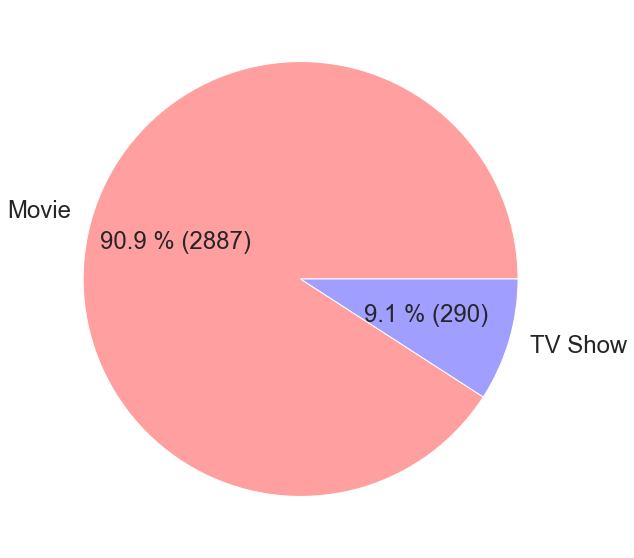

In [142]:
inner_final['type'].isnull().sum()
sf = plt.figure(figsize=(10, 10))
mycolors = ['#FF9F9F', '#A09FFF']
plt.pie(inner_final.type.value_counts(), 
        labels = inner_final.type.value_counts().index,
        autopct = lambda x: '{:.1f} % ({:.0f})'.format(x,(x/100)*inner_final['type'].count()),
        textprops = {'fontsize': 24}, colors = mycolors)